### 1.1 Приведение фала .txt в форму удобную для работы с ним 

In [86]:
import numpy as np
import pandas as pd

def rewriteData():
    fin = open('ex2data1.txt', 'r')
    data = fin.read()
    data = data.replace(',', '   ')
    fin.close()

    fin = open('ex2data1.txt', 'w')
    fin.write(data)
    fin.close()

In [87]:
data = np.loadtxt('ex2data1.txt')

### 1.2 Получение индексов примеров с меткой 1 и меткой 0

In [88]:
X = data[:, 0:2]
y = data[:, 2]


positive_index = np.where(y == 1)
negative_index = np.where(y == 0)

### 1.3 Построение графика с тренировочными данными

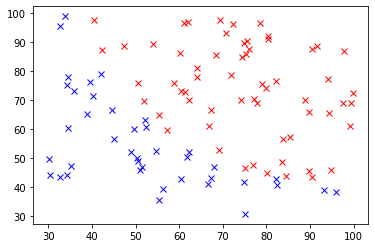

In [89]:
import matplotlib.pyplot as plt


plt.plot(X[positive_index, 0], X[positive_index, 1], 'rx')
plt.plot(X[negative_index, 0], X[negative_index, 1], 'bx')
plt.show()

### 1.3 Работа над данными

Перед нами стоит задачи классификации, поэтому в качестве алгоритма выберем логистическую регрессию.
Наша гипотеза выглядит следущим образом:  $ h_\theta(x^{(i)}) = g(\theta_0 * x_0^{(i)} + \theta_1 * x_1^{(i)} + \theta_2 * x_2^{(i)}) = \frac{1} {(1 + e^{-(\theta_0 * x_0^{(i)} + \theta_1 * x_1^{(i)} + \theta_2 * x_2^{(i)})})} \\ $  

Можно записать иначе: $h_\theta(x^{(i)}) = g(\theta^{T} * x^{(i)}) = \frac{1} {(1 + e^{(-\theta^{T} * x^{(i)})})}$

Добавим в матрицу X дополнительный столбец $x_0 = 1$ для удобства выполнения операций над матрицами. Добавим начальные значения вектора $\theta$

In [90]:
import numpy as np
N = 10
a = np.ones((X.shape[0], 1))
new_X = np.ones((X.shape[0],3))
new_X[:,1:3] = X

theta = np.zeros((new_X.shape[1], 1))

По скольку мы используем логистическую регрессию, то мы будем использовать сигмоиндную функцию: 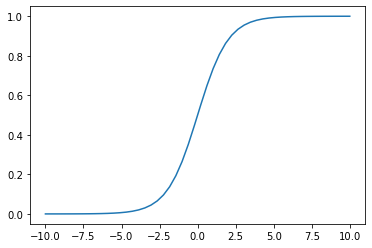

Реализация сигмоидной функции

In [91]:
def sigmoidFunction(z):
    
    g = np.divide(1, 1 + np.exp(-z))

    return g

Перед нами стоит задача классификации, поэтому в качестве функции потерь будем использовать функцию следующего вида: $J(\theta_0, \theta_1, \theta_2) = \frac {1} {m}\sum_{i = 1}^{m} {(-y^{(i)} * \ln(h_\theta(x^{(i)})) - (1 - y^{(i)}) * \ln(1 - h_\theta(x^{(i)}))} \\ $. Данная функция в качестве параметров принимает начальное значение вектора $\theta$, матрицу с признаками $X$ и метки для примеров $y$. Возвращает функция значение функции потерь - $J\underline\ value$ и градиент - $gradient$

In [92]:
def costFunction(theta, X, y):
    
    
    
    
    temp1 = X.dot(theta)
    
    temp2 = sigmoidFunction(temp1)
    temp3 = np.log(temp2)
    temp4 = -y @ temp3 #np.multiply(-y, temp3) temp4 = #np.multiply(-y, temp3)
    
    
    temp5 = np.log(1 - temp2)
    new_y = 1 - y
    temp6 =  new_y @ temp5 #np.multiply(new_y, temp5) #new_y @ temp5
    
    temp7 = temp4 - temp6
    
    temp8 = np.sum(temp7, 0)
    J_value = temp8 / X.shape[0]       #compute CostFunctoin - J_value

    # Compute gradient
    
    temp9 = np.subtract(np.transpose(temp2), y)
    temp10 = np.transpose(temp9)
    temp11 = np.transpose(new_X).dot(temp10)
    gradient = temp11 / new_X.shape[0]

    
    
    return   J_value, gradient# chanhe J_value

В качестве алгоритма оптимизации был выбран TNC. Был импортирован из библиотеки SciPy. На выходе мы получаем вектор $\theta$ значения, которого соответствуют минимому или точке близкой к минимому фнкции потерь и количество итераций, которое потребовалось для того, чтобы достичь минимума.

In [93]:
import scipy.optimize as op

J_value, gradient = costFunction(theta, new_X, y)
result = op.fmin_tnc(func = costFunction, x0 = theta.flatten(), args=(new_X, y))
new_theta = result[0]

Теперь мы находим минимальное и максимальное значение по оси $x_1$ для того, чтобы взуализировать найденную границу решений.

In [94]:
minimum = new_X[0, 1]
index_min = 0
maximum = new_X[0, 1]
index_max = 0
for x in range(new_X.shape[0]):
    if new_X[x, 1] <= minimum:
        minimum = new_X[x, 1]
        index_min = x
    if new_X[x, 1] >= maximum:
        maximum = new_X[x, 1]
        index_max = x

Нахождение значений по $x_2$, использую формулу: $x_2 = \frac {(-\theta_0 - \theta_1 * x_1)}  {\theta_2} \\ $. После найденных значений $x_2$ строим границу решений - прямая.

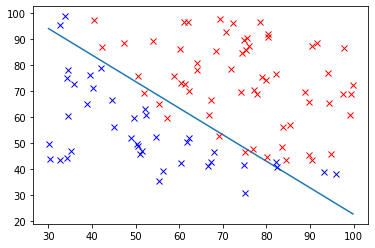

In [95]:
# y = theta0 + theta1 * x1 + theta2 * x2; -theta2*x2 = theta0 + theta1 * x1; x2 = (-theta0 - theta1 * x1) / theta2

x_line = np.array([minimum, maximum])

temp1 = (-new_theta[0] - new_theta[1] * x_line[0]) / new_theta[2]
temp2 = (-new_theta[0] - new_theta[1] * x_line[1]) / new_theta[2]



plt.plot(x_line, [temp1, temp2])
plt.plot(X[positive_index, 0], X[positive_index, 1], 'rx')
plt.plot(X[negative_index, 0], X[negative_index, 1], 'bx')
plt.show()